# Session 1: Menorca Habitat Exploration

Exploración y análisis de datos geoespaciales para conservación de hábitats en Menorca.

## 1. Import Required Libraries

In [ ]:
import sys
import os

# Agregar la ruta del src al path
sys.path.insert(0, os.path.abspath('../src'))

# Importaciones principales
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
import warnings

# Importar funciones auxiliares
from utils import load_geojson, plot_habitat_map, prepare_data

warnings.filterwarnings('ignore')

# Configurar matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 2. Load and Inspect GeoJSON Data

In [2]:
# Ruta del dataset
url = "https://gitlab.com/drvicsana/opt-milp-project-2025/-/raw/main/datasets/dataset.geojson"

# Cargar los datos
try:
    gdf = gpd.read_file(url)
    print(f"✓ Dataset cargado exitosamente")
    print(f"\nDimensiones: {gdf.shape}")
    print(f"\nColumnas: {gdf.columns.tolist()}")
except Exception as e:
    print(f"✗ Error al cargar el dataset: {e}")

✓ Dataset cargado exitosamente

Dimensiones: (1401, 13)

Columnas: ['grid_id', 'cell_area_km2', 'dominant_land_cover_name', 'cost_adaptation_atelerix', 'cost_adaptation_martes', 'cost_adaptation_eliomys', 'cost_adaptation_oryctolagus', 'cost_corridor', 'has_atelerix_algirus', 'has_martes_martes', 'has_eliomys_quercinus', 'has_oryctolagus_cuniculus', 'geometry']


In [3]:
# Información básica del GeoDataFrame
print("=== Información General ===")
gdf.info()

print("\n=== Primeras filas ===")
print(gdf.head())

print("\n=== Sistema de Coordenadas (CRS) ===")
print(f"CRS: {gdf.crs}")

print("\n=== Geometría ===")
print(f"Tipos de geometría: {gdf.geometry.type.unique()}")
print(f"Número de geometrías vacías: {gdf.geometry.isna().sum()}")

=== Información General ===
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   grid_id                      1401 non-null   object  
 1   cell_area_km2                1401 non-null   float64 
 2   dominant_land_cover_name     1401 non-null   object  
 3   cost_adaptation_atelerix     1401 non-null   float64 
 4   cost_adaptation_martes       1401 non-null   float64 
 5   cost_adaptation_eliomys      1401 non-null   float64 
 6   cost_adaptation_oryctolagus  1401 non-null   float64 
 7   cost_corridor                1401 non-null   float64 
 8   has_atelerix_algirus         1401 non-null   bool    
 9   has_martes_martes            1401 non-null   bool    
 10  has_eliomys_quercinus        1401 non-null   bool    
 11  has_oryctolagus_cuniculus    1401 non-null   bool    
 12  geometry                  

## 3. Exploratory Data Analysis

In [4]:
# Análisis estadístico
print("=== Resumen Estadístico ===")
print(gdf.describe())

=== Resumen Estadístico ===
       cell_area_km2  cost_adaptation_atelerix  cost_adaptation_martes  \
count    1401.000000                1401.00000             1401.000000   
mean        0.495792                   3.13536                4.303726   
std         0.153663                   2.16095                2.943530   
min         0.000018                   0.50000                0.500000   
25%         0.562500                   1.81000                2.050000   
50%         0.562500                   2.37000                2.910000   
75%         0.562500                   3.63000                6.910000   
max         0.562500                  13.28000               14.780000   

       cost_adaptation_eliomys  cost_adaptation_oryctolagus  cost_corridor  
count              1401.000000                  1401.000000    1401.000000  
mean                  4.388908                    61.152827       1.984347  
std                   3.007104                    94.590253       0.501302

In [5]:
# Verificar valores faltantes
print("=== Valores Faltantes ===")
missing = gdf.isnull().sum()
print(missing[missing > 0] if missing.any() else "No hay valores faltantes")

print("\n=== Tipos de Datos ===")
print(gdf.dtypes)

=== Valores Faltantes ===
No hay valores faltantes

=== Tipos de Datos ===
grid_id                          object
cell_area_km2                   float64
dominant_land_cover_name         object
cost_adaptation_atelerix        float64
cost_adaptation_martes          float64
cost_adaptation_eliomys         float64
cost_adaptation_oryctolagus     float64
cost_corridor                   float64
has_atelerix_algirus               bool
has_martes_martes                  bool
has_eliomys_quercinus              bool
has_oryctolagus_cuniculus          bool
geometry                       geometry
dtype: object


In [6]:
# Estadísticas por columna numérica
numeric_cols = gdf.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    print("=== Estadísticas Detalladas de Columnas Numéricas ===")
    for col in numeric_cols:
        print(f"\n{col}:")
        print(f"  Min: {gdf[col].min()}")
        print(f"  Max: {gdf[col].max()}")
        print(f"  Media: {gdf[col].mean():.2f}")
        print(f"  Mediana: {gdf[col].median():.2f}")
        print(f"  Std Dev: {gdf[col].std():.2f}")
else:
    print("No hay columnas numéricas en el dataset")

=== Estadísticas Detalladas de Columnas Numéricas ===

cell_area_km2:
  Min: 1.8042530912193614e-05
  Max: 0.5625000000014406
  Media: 0.50
  Mediana: 0.56
  Std Dev: 0.15

cost_adaptation_atelerix:
  Min: 0.5
  Max: 13.28
  Media: 3.14
  Mediana: 2.37
  Std Dev: 2.16

cost_adaptation_martes:
  Min: 0.5
  Max: 14.78
  Media: 4.30
  Mediana: 2.91
  Std Dev: 2.94

cost_adaptation_eliomys:
  Min: 0.5
  Max: 13.06
  Media: 4.39
  Mediana: 2.95
  Std Dev: 3.01

cost_adaptation_oryctolagus:
  Min: 0.5
  Max: 353.52
  Media: 61.15
  Mediana: 4.30
  Std Dev: 94.59

cost_corridor:
  Min: 0.51
  Max: 3.63
  Media: 1.98
  Mediana: 2.00
  Std Dev: 0.50


## 4. Spatial Visualization

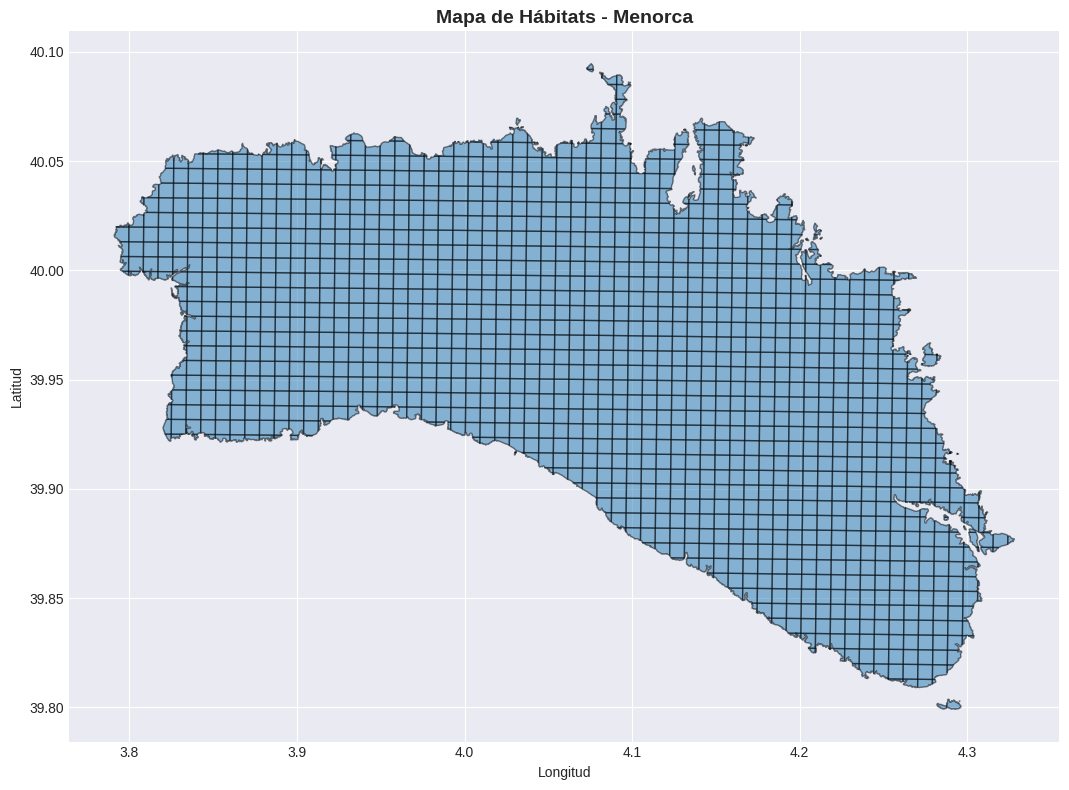

✓ Mapa generado: 1401 características visualizadas


In [7]:
# Visualización estática con matplotlib
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
ax.set_title('Mapa de Hábitats - Menorca', fontsize=14, fontweight='bold')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.tight_layout()
plt.show()

print(f"✓ Mapa generado: {len(gdf)} características visualizadas")

In [8]:
# Crear mapa interactivo con folium (si las coordenadas están disponibles)
try:
    # Calcular centroide del área de estudio
    bounds = gdf.total_bounds  # [minx, miny, maxx, maxy]
    center_lat = (bounds[1] + bounds[3]) / 2
    center_lon = (bounds[0] + bounds[2]) / 2
    
    # Crear mapa
    m = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=12,
        tiles='OpenStreetMap'
    )
    
    # Agregar características del dataset
    for idx, row in gdf.iterrows():
        try:
            if row.geometry.geom_type == 'Point':
                folium.CircleMarker(
                    location=[row.geometry.y, row.geometry.x],
                    radius=5,
                    popup=f"Punto {idx}",
                    color='blue'
                ).add_to(m)
        except:
            pass
    
    print("✓ Mapa interactivo creado exitosamente")
    m
except Exception as e:
    print(f"✗ Error al crear mapa interactivo: {e}")

✓ Mapa interactivo creado exitosamente


## 5. Data Preprocessing and Validation

In [9]:
# Preparar datos
gdf_clean = prepare_data(gdf)

print(f"Datos originales: {len(gdf)} filas")
print(f"Datos limpios: {len(gdf_clean)} filas")
print(f"Filas removidas: {len(gdf) - len(gdf_clean)}")

Datos originales: 1401 filas
Datos limpios: 1401 filas
Filas removidas: 0


In [10]:
# Validación de geometría
print("=== Validación de Geometría ===")

# Verificar geometrías válidas
valid_geom = gdf_clean.geometry.is_valid.sum()
total_geom = len(gdf_clean)

print(f"Geometrías válidas: {valid_geom}/{total_geom}")
print(f"Geometrías inválidas: {total_geom - valid_geom}")

# Reparar geometrías inválidas si es necesario
if (total_geom - valid_geom) > 0:
    gdf_clean['geometry'] = gdf_clean['geometry'].apply(
        lambda geom: geom.buffer(0) if not geom.is_valid else geom
    )
    print("✓ Geometrías reparadas")

=== Validación de Geometría ===
Geometrías válidas: 1401/1401
Geometrías inválidas: 0


In [11]:
# Resumen de validación
print("\n=== Resumen de Validación ===")
print(f"Filas totales: {len(gdf_clean)}")
print(f"Columnas: {len(gdf_clean.columns)}")
print(f"Sistema de Coordenadas: {gdf_clean.crs}")
print(f"Área de cobertura:")
bounds = gdf_clean.total_bounds
print(f"  Latitud: [{bounds[1]:.4f}, {bounds[3]:.4f}]")
print(f"  Longitud: [{bounds[0]:.4f}, {bounds[2]:.4f}]")
print(f"\n✓ Dataset validado correctamente")


=== Resumen de Validación ===
Filas totales: 1401
Columnas: 13
Sistema de Coordenadas: EPSG:4326
Área de cobertura:
  Latitud: [39.7991, 40.0946]
  Longitud: [3.7909, 4.3280]

✓ Dataset validado correctamente


## 6. Export Processed Data

In [12]:
# Guardar datos procesados
import json
from datetime import datetime

# Crear archivo de log de preprocesamiento
log = {
    'timestamp': datetime.now().isoformat(),
    'original_rows': len(gdf),
    'processed_rows': len(gdf_clean),
    'rows_removed': len(gdf) - len(gdf_clean),
    'columns': gdf_clean.columns.tolist(),
    'crs': str(gdf_clean.crs),
    'geometry_types': gdf_clean.geometry.type.unique().tolist(),
    'valid_geometries': int(gdf_clean.geometry.is_valid.sum()),
    'total_geometries': len(gdf_clean)
}

print("=== Log de Preprocesamiento ===")
for key, value in log.items():
    print(f"{key}: {value}")

=== Log de Preprocesamiento ===
timestamp: 2025-10-29T09:29:55.479293
original_rows: 1401
processed_rows: 1401
rows_removed: 0
columns: ['grid_id', 'cell_area_km2', 'dominant_land_cover_name', 'cost_adaptation_atelerix', 'cost_adaptation_martes', 'cost_adaptation_eliomys', 'cost_adaptation_oryctolagus', 'cost_corridor', 'has_atelerix_algirus', 'has_martes_martes', 'has_eliomys_quercinus', 'has_oryctolagus_cuniculus', 'geometry']
crs: EPSG:4326
geometry_types: ['Polygon', 'MultiPolygon']
valid_geometries: 1401
total_geometries: 1401


In [13]:
# Guardar los datos procesados
output_dir = '../data'

# Guardar como GeoJSON
output_geojson = os.path.join(output_dir, 'dataset_processed.geojson')
gdf_clean.to_file(output_geojson, driver='GeoJSON')
print(f"✓ Datos procesados guardados: {output_geojson}")

# Guardar log como JSON
output_log = os.path.join(output_dir, 'preprocessing_log.json')
with open(output_log, 'w') as f:
    json.dump(log, f, indent=2)
print(f"✓ Log de preprocesamiento guardado: {output_log}")

print("\n=== Exploración Completada ===")
print("Dataset listo para optimización")

✓ Datos procesados guardados: ../data/dataset_processed.geojson
✓ Log de preprocesamiento guardado: ../data/preprocessing_log.json

=== Exploración Completada ===
Dataset listo para optimización
